# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LogisticRegression

# Loading Data and Inspection

In [2]:
df= pd.read_csv('bank-additional-full.csv', sep = ";")
print(df.shape) # prints data shape
print(df.columns) # print columns
df.head()

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data inputs
1.age (numeric)

2.job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)

3.marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)

4.education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)

5.default: has credit in default? (categorical: “no”, “yes”, “unknown”)

6.housing: has housing loan? (categorical: “no”, “yes”, “unknown”)

7.loan: has personal loan? (categorical: “no”, “yes”, “unknown”)

8.contact: contact communication type (categorical: “cellular”, “telephone”)

9.month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)

10.day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)

11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14.previous: number of contacts performed before this campaign and for this client (numeric)

15.poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

16.emp.var.rate: employment variation rate — (numeric)

17.cons.price.idx: consumer price index — (numeric)

18.cons.conf.idx: consumer confidence index — (numeric)

19.euribor3m: euribor 3 month rate — (numeric)

20.nr.employed: number of employees — (numeric)

## Target Variable

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”

In [3]:
class UnderstandingData:
    
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.raw_df_grouped = raw_df.groupby("y")
        self.class_name_no = "no"
        self.class_name_yes = "yes"
        self.raw_df_grouped_no = self.raw_df_grouped.get_group(self.class_name_no)
        self.raw_df_grouped_yes = self.raw_df_grouped.get_group(self.class_name_yes)

    def plot_histogram_continuous(self, feature_name, bin_size):
        plt.figure()
        plt.hist(self.raw_df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.raw_df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")

    def plot_histogram_categorical(self, feature_name):
        feature_df = pd.DataFrame()
        feature_df["no"] = self.raw_df_grouped_no[feature_name].value_counts()
        feature_df["yes"] = self.raw_df_grouped_yes[feature_name].value_counts()
        
        feature_df.plot(kind='bar')
        plt.title("Feature Histogram - "+feature_name)
        plt.ylabel("Count")
        plt.xlabel("Feature unique values")
        plt.tight_layout()

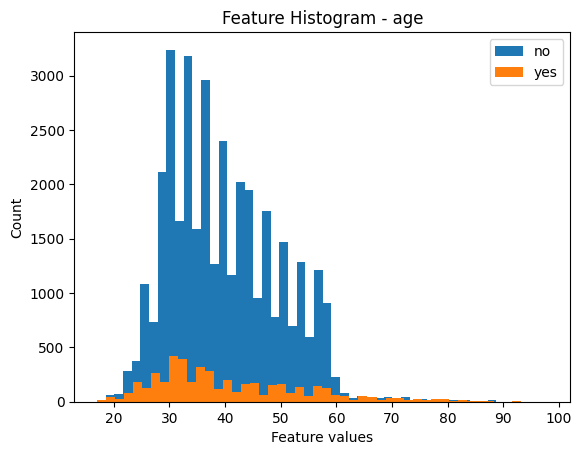

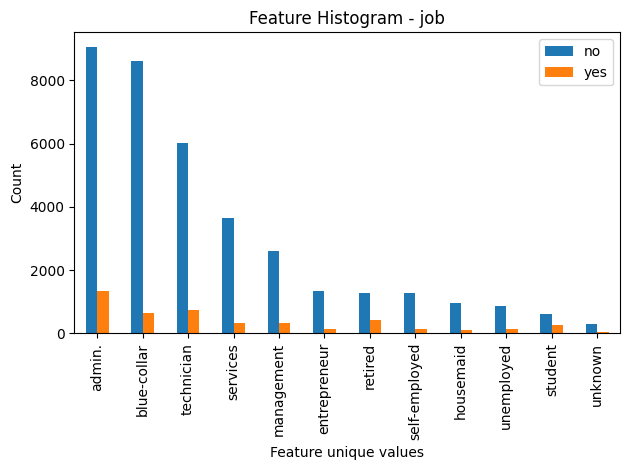

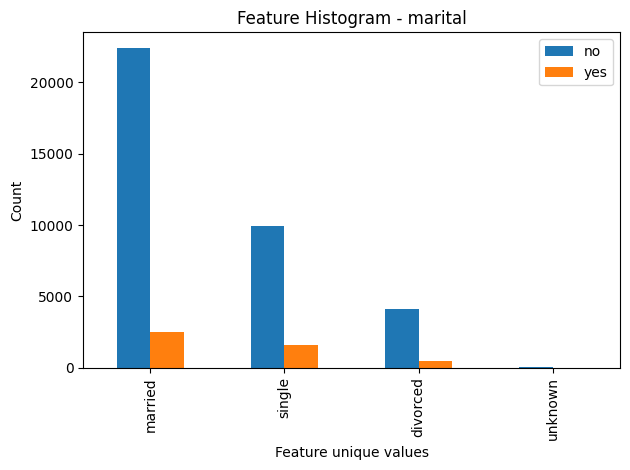

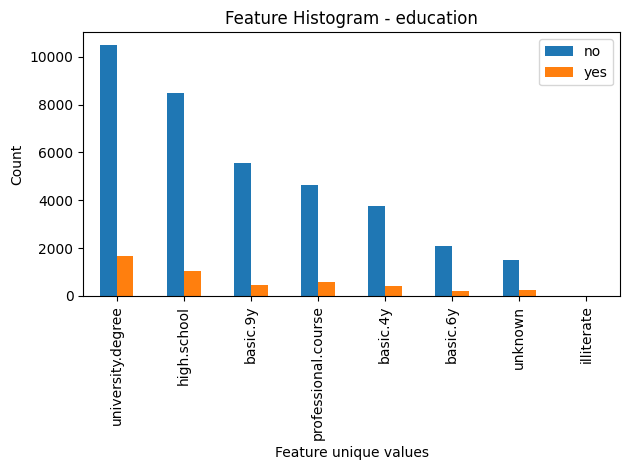

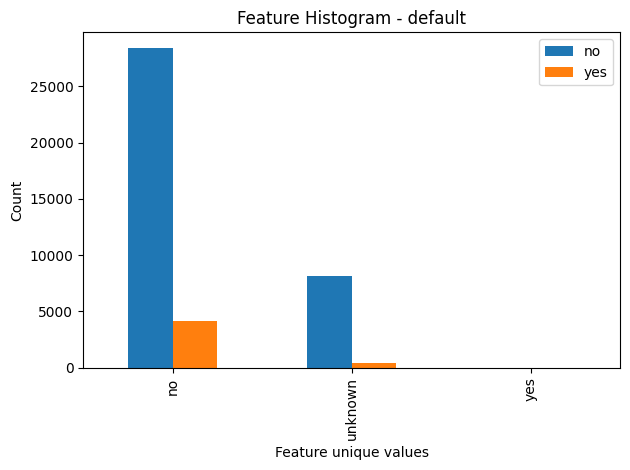

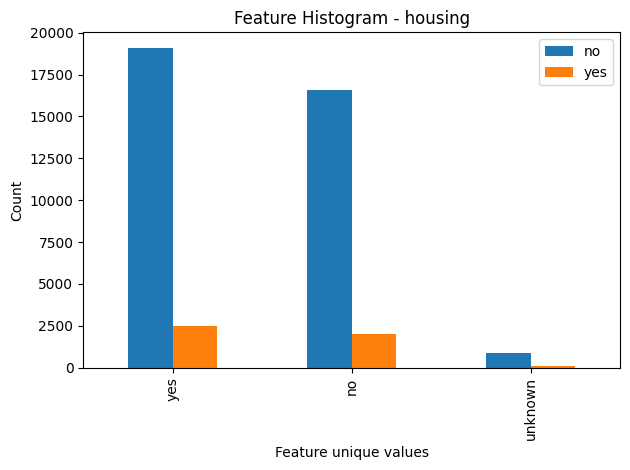

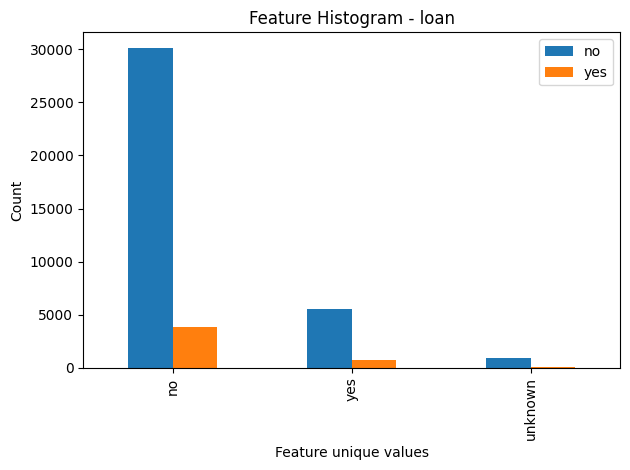

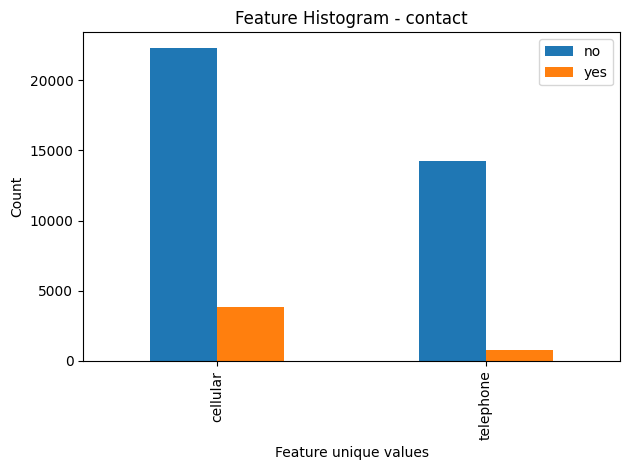

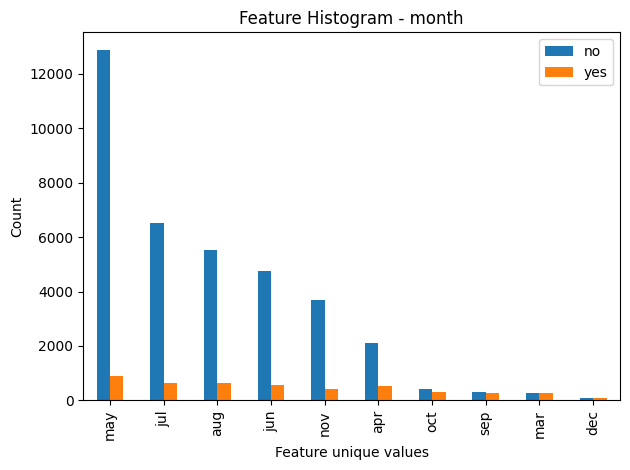

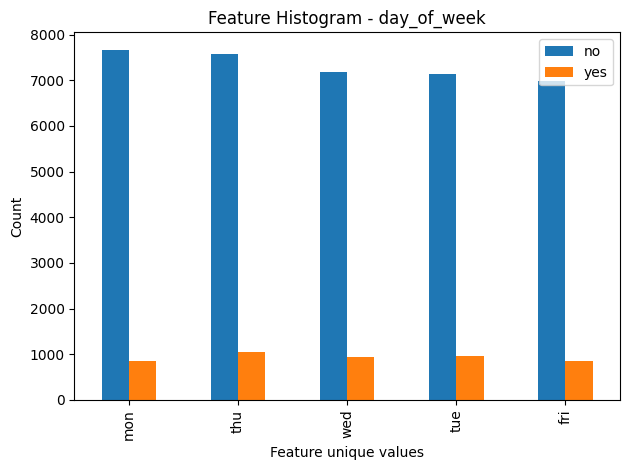

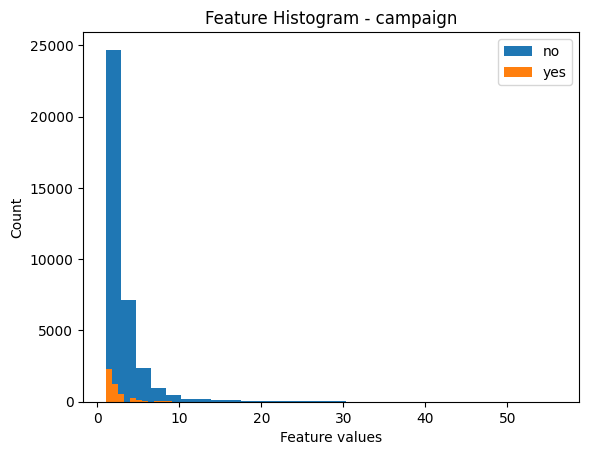

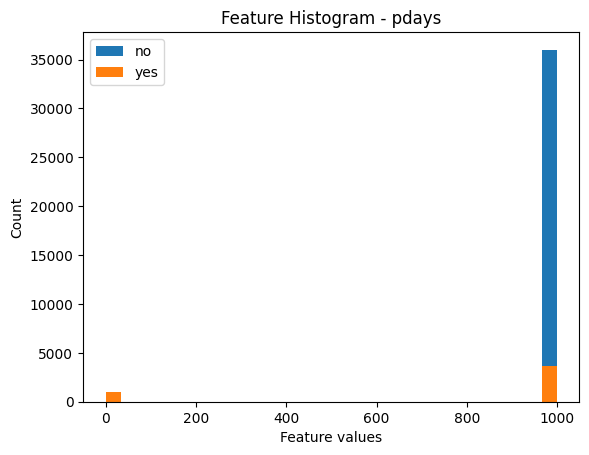

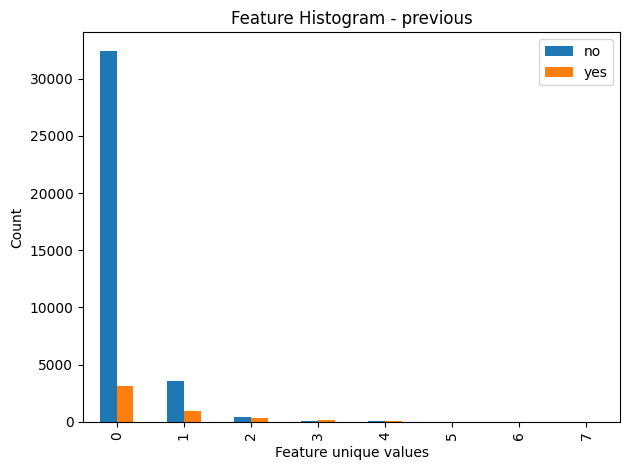

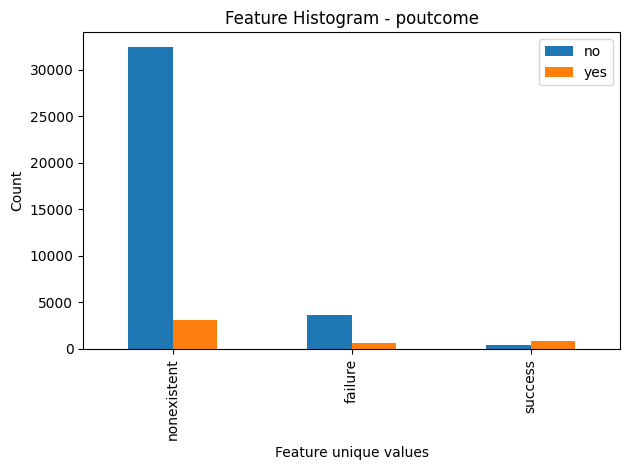

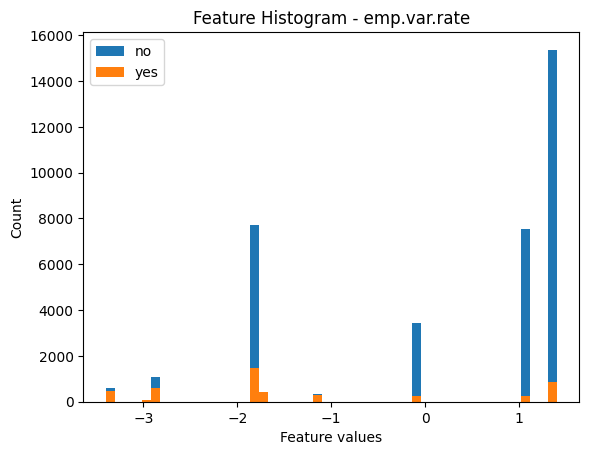

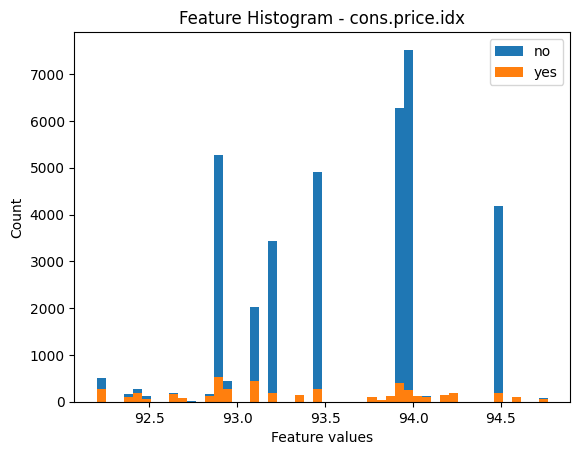

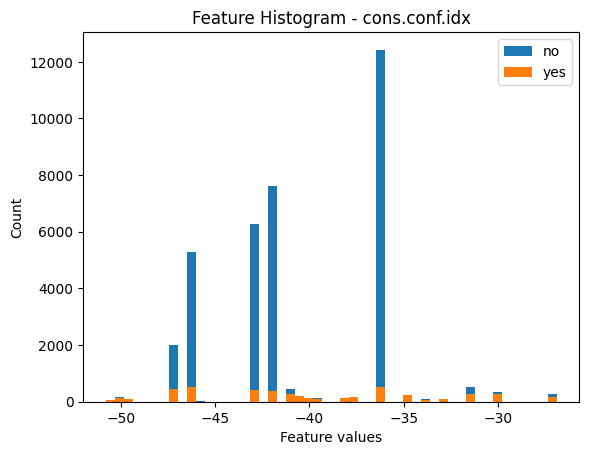

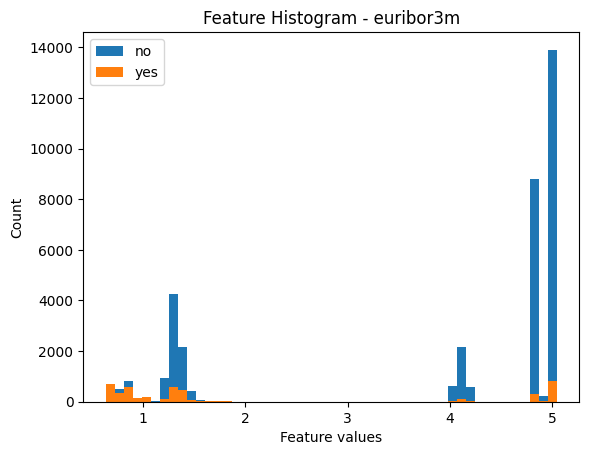

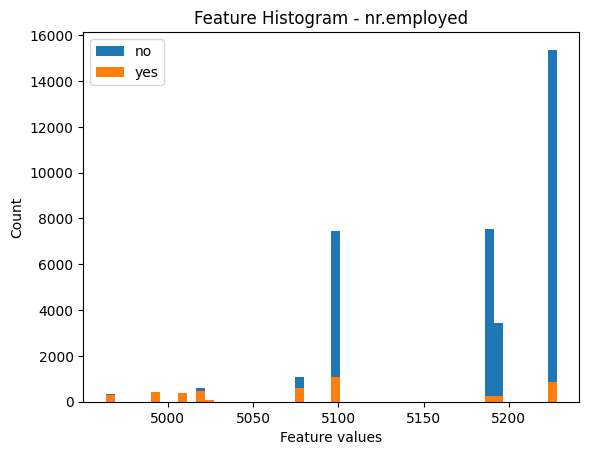

In [4]:
understanding_data = UnderstandingData(df)

### Feature 1 - AGE
understanding_data.plot_histogram_continuous("age", 50)

### Feature 2 - JOB
understanding_data.plot_histogram_categorical("job")

### Feature 3 - MARITAL
understanding_data.plot_histogram_categorical("marital")

### Feature 4 - EDUCATION
understanding_data.plot_histogram_categorical("education")

### Feature 5 - DEFAULT
understanding_data.plot_histogram_categorical("default")

### Feature 6 - HOUSING
understanding_data.plot_histogram_categorical("housing")

### Feature 7 - LOAN
understanding_data.plot_histogram_categorical("loan")

### Feature 8 - CONTACT
understanding_data.plot_histogram_categorical("contact")

### Feature 9 - MONTH
understanding_data.plot_histogram_categorical("month")

### Feature 10 - DAY OF WEEK
understanding_data.plot_histogram_categorical("day_of_week")

### Feature 11 - CAMPAIGN
understanding_data.plot_histogram_continuous("campaign", 30)

### Feature 12 - PDAYS
understanding_data.plot_histogram_continuous("pdays", 30)

### Feature 13 - PREVIOUS
understanding_data.plot_histogram_categorical("previous")

### Feature 14 - POUTCOME
understanding_data.plot_histogram_categorical("poutcome")

### Feature 15 - emp.var.rate
understanding_data.plot_histogram_continuous("emp.var.rate", 50)

### Feature 16 - cons.price.idx
understanding_data.plot_histogram_continuous("cons.price.idx", 50)

### Feature 17 - cons.conf.idx
understanding_data.plot_histogram_continuous("cons.conf.idx", 50)

### Feature 18 - euribor3m
understanding_data.plot_histogram_continuous("euribor3m", 50)

### Feature 19 - nr.employed
understanding_data.plot_histogram_continuous("nr.employed", 50)

In [5]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
df["y"].value_counts()/len(df.y)

no     0.887346
yes    0.112654
Name: y, dtype: float64

## Understanding graphs

88% of the observations are No as compared to just 11 % data as Yes.Clearly this dataset is an imbalanced dataset.

There are missing values so we need to impute it.

Features need to be preprocessed.

Many features are useless which need to be deleted 1. duration

Some Important features are

Jobs

Education (illterate people seems to get convinced by campaign)

Months (Seasonal effect can been seen in the data. In may the sales increases)

Previous outcome seems important because new customers seems to convert more

Average age of people who converted as higher than those who didn't

People who converted were exposed to fewer campaigns than those who didn't

In [7]:
df.drop(["duration"] , axis=1,inplace=True)
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.replace('unknown',np.NaN,inplace=True)

In [9]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

## Six Columns have unknow value

## We will use Decision Tree to fill these values

## After that use logistic regression for model training
## JOB

In [10]:
from sklearn.tree import DecisionTreeClassifier
    
def convert_cats(df,cols):
  for i in cols:
    df[i] = df[i].astype("category").cat.codes
  return df

def fillMissing(missing_cols , df):

  df1=df.copy()
  for col in missing_cols:
    df1=convert_cats(df1,['job','marital','education','loan','contact','month','poutcome','y',"default" ,"housing","day_of_week"])
    test=df1[df1[col]==-1]
    train=df1[df1[col]!=-1]
    tree=DecisionTreeClassifier()
    tree.fit(train.drop(col,axis=1),train[col])
    test.loc[:,col]=tree.predict(test.drop(col,axis=1))
    df1 = train.append(test)
    df1.replace(-1,np.NaN,inplace=True)
  
  return df1  

In [11]:
df1 = fillMissing(["job" , "marital","education","loan","default" ,"housing"],df.copy())
df1.shape

/var/folders/56/zmtx4ds53g3635qtkwj1xkv80000gn/T/ipykernel_40635/2076670974.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,col]=tree.predict(test.drop(col,axis=1))
/var/folders/56/zmtx4ds53g3635qtkwj1xkv80000gn/T/ipykernel_40635/2076670974.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = train.append(test)
/var/folders/56/zmtx4ds53g3635qtkwj1xkv80000gn/T/ipykernel_40635/2076670974.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

(41188, 20)

In [12]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Creating Dummies for categorical

In [13]:
cat_cols = ['job','marital','education','loan','contact','month','poutcome',"day_of_week","default" ,"housing" ]

for col in cat_cols:
    df1 = df1.join(pd.get_dummies(df1[col],prefix = col))

keep = [col for col in df1.columns if col not in cat_cols]
df1 = df1 [keep]

In [14]:
df1["y"]=df1.y.astype('category')
df1["y"]=df1["y"].cat.codes

In [15]:
df1.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'marital_0', 'marital_1', 'marital_2',
       'education_0', 'education_1', 'education_2', 'education_3',
       'education_4', 'education_5', 'education_6', 'loan_0', 'loan_1',
       'contact_0', 'contact_1', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'poutcome_0', 'poutcome_1', 'poutcome_2', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'default_0', 'default_1', 'housing_0', 'housing_1'],
      dtype='object')

In [16]:
df1.y.head()


0    0
2    0
3    0
4    0
6    0
Name: y, dtype: int8

In [17]:
cols = df1.columns.values.tolist()
y=df1['y']
X = df1[[col for col in cols if col !="y"]]
X.shape ,y.shape

((41188, 56), (41188,))

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (28831, 56)
Number transactions y_train dataset:  (28831,)
Number transactions X_test dataset:  (12357, 56)
Number transactions y_test dataset:  (12357,)


In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3221
Before OverSampling, counts of label '0': 25610 

After OverSampling, the shape of train_X: (51220, 56)
After OverSampling, the shape of train_y: (51220,) 

After OverSampling, counts of label '1': 25610
After OverSampling, counts of label '0': 25610


## Hyperparameter Search

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/deviphanimac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/deviphanimac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [21]:
clf.best_params_

{'C': 9.0}

In [22]:
lr1 = LogisticRegression(C=2,penalty='l2', verbose=5,solver="lbfgs",max_iter=150)
lr1.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           57     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00

X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D

/Users/deviphanimac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(C=2, max_iter=150, verbose=5)

p  Nact     Projg        F
   57    150    171      1     0     0   4.477D+05   1.939D+04

 X = -1.9468D-02 -4.8853D-01 -2.3790D-03 -8.5584D-01  3.0452D-02  8.9576D-01
     -3.5023D-02 -5.2895D-02 -1.4975D-02 -7.0110D-01 -8.9085D-01 -2.2062D-01
     -1.4851D-01 -4.2770D-01  2.0082D-02 -2.0351D-01 -5.3165D-01 -4.1366D-02
     -6.6067D-01 -1.5166D-01 -5.7566D-01 -1.0305D+00 -3.6629D-01 -4.3066D-01
     -3.1122D-01 -7.4454D-01 -9.8163D-01 -1.5889D-03 -5.7431D-01 -5.6465D-01
     -3.7920D-01 -7.7166D-01  2.6667D-01 -8.7143D-01  6.7526D-03  8.0050D-02
      2.0127D-02  4.3489D-01  4.1265D-02  2.1641D-01 -1.4018D+00 -2.0403D-01
      9.4811D-02 -2.6228D-02 -7.5809D-01  1.7415D-01  1.3293D-02 -8.2960D-01
     -1.0211D+00 -7.5682D-01 -8.1524D-01 -7.3000D-01  6.4416D-03 -1.2315D-03
     -1.0618D+00 -9.5581D-01  5.2110D-03
  F =   19388.989624849244     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [23]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
lr1.score(X_test,y_test)

0.8286801003479809

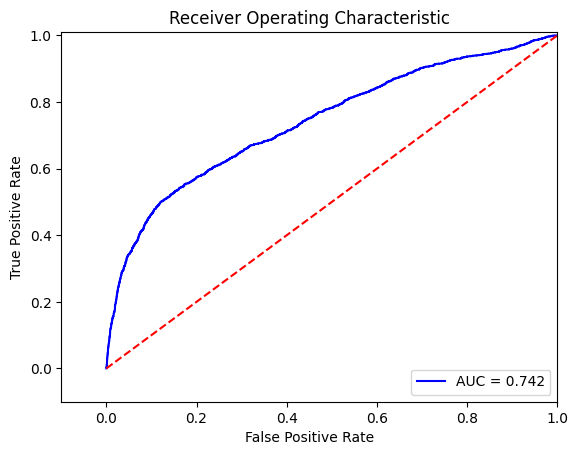

In [24]:
y_pred_sample_score = lr1.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [25]:
roc_auc

0.7416575403346507

In [26]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     10938
           1       0.34      0.51      0.41      1419

    accuracy                           0.83     12357
   macro avg       0.63      0.69      0.65     12357
weighted avg       0.86      0.83      0.84     12357



In [28]:
cnf_matrix

array([[9519, 1419],
       [ 698,  721]])